# Introduction
The task we have here is to establish a classifier which can automaticly distinguish spam and ham for the user who received email.\
\
The dataset here was composed of total 1572 spam and ham emails.\
\
First, we need to devided the total emails into training and test datasets.\
For 75% emails as training set, the rest 25% will be test datasets\
\
Then put all the words appeared in the training set into one vector, then according to the frequence of each word in the total training set to calculate $p(w_{1})$,$p(w_{2})$,...,$p(w_{n})$\
$$ p(w) = \frac{frequence\ of\ w\ in\ dataset}{total\ number\ of\ words\ in\ dataset}$$
According to the frequence of each word belongs to spam in training set, we can calculate $p(w_{1}|spam)$,$p{w_{2}|spam}$...$p{w_{n}|spam}$.\
$$p(w|spam) = \frac{frequence\ of\ w\ in\ spam\ messages}{total\ number\ of\ words\ in\ spam\ messages}$$
After training the model, we need to set a classifier according to the Naive Bayes solution.\
$$
\begin{equation}
\begin{split}
p(spam|w_{1},w_{2}...w_{m}) &= \frac{p(spam)\cdot p(w_{1},w_{2}...w_{m}|spam)}{p(w_{1},w_{2}...w_{m})}
&=\frac{p(spam) \cdot p(w_{1}|spam) \cdot p(w_{2}|spam)\cdot...\cdot p(w_{m}|spam)}{p(w_{1} \cdot p(w_{2}|spam)\cdot...\cdot p(w_{m}|spam)}
\end{split}
\end{equation}
$$\
Then we can put the emails from test data into the classifier. See if the probability ()is larger than p(spam). \
If so, then the classifier will classify this email into spam, otherwise, the email would be recognized as ham.\
After test all the test emails.
The accuracy of this classifier is higher than 0.85\
Therefore the performance is good.

                                             message label
0  Go until jurong point, crazy.. Available only ...     0
1                      Ok lar... Joking wif u oni...     0
2  Free entry in 2 a wkly comp to win FA Cup fina...     1
3  U dun say so early hor... U c already then say...     0
4  Nah I don't think he goes to usf, he lives aro...     0


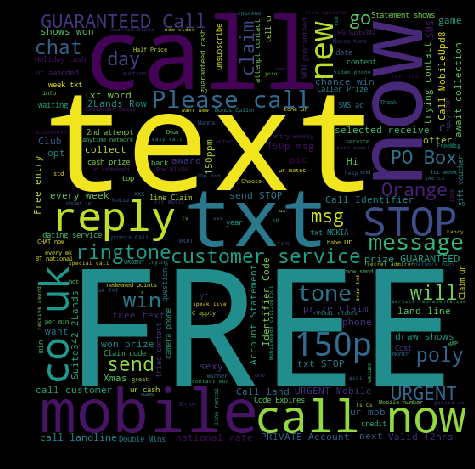

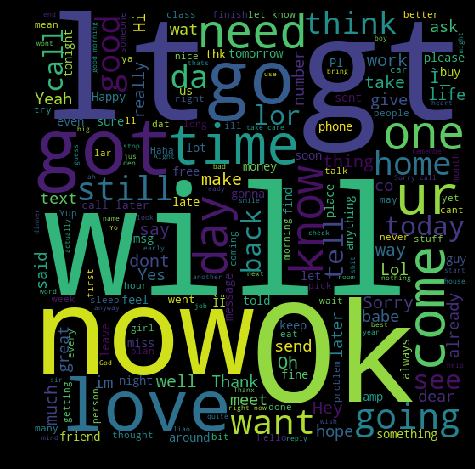

In [81]:
import numpy as np
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
import nltk

#import data
pd.set_option('display.max_column',None)
mails = pd.read_csv('spam.csv', encoding = 'latin-1')

#modify data
del mails['Unnamed: 2']
del mails['Unnamed: 3']
del mails['Unnamed: 4']

mails['v1'][mails['v1']=='ham'] = 0
mails['v1'][mails['v1']=='spam'] = 1
mails = mails[['v2', 'v1']]

mails.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)
print(mails.head())

#devide data into train and test dataset
totalMails = mails['message'].shape[0]
trainIndex, testIndex = [],[]
for i in range(totalMails):
    if np.random.uniform(0,1) < 0.75:
        trainIndex.append(i)
    else:
        testIndex.append(i)
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

#WordCloud
total_words = ' '.join(list(mails['message']))
spam_words = ' '.join(list(mails[mails['label']==1]['message']))
spam_wc = wordcloud.WordCloud(width = 512, height = 512).generate(spam_words)
ham_words = ' '.join(list(mails[mails['label']==0]['message']))
ham_wc = wordcloud.WordCloud(width = 512, height = 512).generate(ham_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

Here is the method which implement from scratch

alpha is  0
total number of emails in test data 1408
number of test data which put into the right place 1206
accuracy 0.8565340909090909
alpha is  1
total number of emails in test data 1408
number of test data which put into the right place 1268
accuracy 0.9005681818181818
alpha is  2
total number of emails in test data 1408
number of test data which put into the right place 1288
accuracy 0.9147727272727273
alpha is  3
total number of emails in test data 1408
number of test data which put into the right place 1303
accuracy 0.9254261363636364
alpha is  4
total number of emails in test data 1408
number of test data which put into the right place 1308
accuracy 0.9289772727272727
alpha is  5
total number of emails in test data 1408
number of test data which put into the right place 1311
accuracy 0.9311079545454546
alpha is  6
total number of emails in test data 1408
number of test data which put into the right place 1313
accuracy 0.9325284090909091
alpha is  7
total number of emails in tes

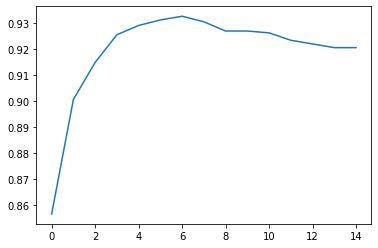

In [99]:
#put all the words in training set into a long string
train_total_words = ' '.join(list(trainData['message']))
train_spam_words = ' '.join(list(trainData[trainData['label'] == 1]['message']))

#devide messages strings into single words
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = nltk.word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1 :
        w = []
        for i in range(len(words) - gram + 1):
            w += [''.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stop_words.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = nltk.stem.PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words

spamWords = process_message(train_spam_words)
totalWords = process_message(train_total_words)
#self-defined naive classifier
class SpamDetect:
    def __init__(self):
        self.p_w = {}
        self.p_w_spam = {}
        self.seen_total = set()
        self.seen_spam = set()
        self.total_freq = {}
        self.spam_freq = {}
        
    def SpamTraining(self, total, spam, type = 'Bag of Words'):
        for word in total:
            if word not in self.seen_total:
                self.seen_total.add(word)
                self.total_freq[word] = 1
            else:
                self.total_freq[word] += 1
        for word in spam:
            if word not in self.seen_spam:
                self.seen_spam.add(word)
                self.spam_freq[word] = 1
            else:
                self.spam_freq[word] += 1
        for word in self.total_freq:
            self.p_w[word] = self.total_freq[word]/len(total)
        for word in self.spam_freq:
            self.p_w_spam[word] = (self.spam_freq[word] + alpha)/(len(spam) + alpha *(len(spam)))
    
            
    def SpamClassifier(self,message):
        messageWord = process_message(message)
        s = 1
        Is_spam = 0
        for word in messageWord:
            if (word in self.p_w_spam) & (word in self.p_w):
                s *= (self.p_w_spam[word]/self.p_w[word])
        if s > 1 :
            Is_spam = 1
#            print("the message is spam")
        else :
            Is_spam = 0
#            print("the message is ham")
        return Is_spam

accuracies = []
for i in range(15):
    alpha = i
    x = SpamDetect()
    x.SpamTraining(totalWords,spamWords)
    count = 0
    right = 0
    for i in testData.index:
    #    print(testData.loc[i]['message'])
        s = x.SpamClassifier(testData.loc[i]['message'])   #judge messge is spam or not
        if s == testData.loc[i]['label']:
            right +=1
        count += 1
    print('alpha is ', alpha)
    print('total number of emails in test data',count)
    print('number of test data which put into the right place',right)
    print('accuracy',right/count)
    accuracies.append(right/count)
plt.plot(range(15),accuracies)

In [112]:
#The method in sklearn
#devide messages strings into single words
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer = process_message).fit_transform(mails['message'])

#devide data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, mails['label'], test_size = 0.25, random_state = 0)
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

X_train = X_train.astype('int')
y_train = y_train.astype('int')

#Using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train, y_1_train)

#analyze training data
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)

print('classification report for training data')
print(classification_report(y_train ,pred))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_1_train,pred))

#analyse test data
X_test = X_test.astype('int')
y_test = y_test.astype('int')
test_pred = classifier.predict(X_test)

print('classification report for training data')
print(classification_report(y_test ,test_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,test_pred))
print()
print('Accuracy: ', accuracy_score(y_test,test_pred))

classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3629
           1       1.00      1.00      1.00       550

    accuracy                           1.00      4179
   macro avg       1.00      1.00      1.00      4179
weighted avg       1.00      1.00      1.00      4179

Confusion Matrix: 
 [[3629    0]
 [   1  549]]

Accuracy:  0.9997607083034219
classification report for training data
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1196
           1       0.43      0.97      0.60       197

    accuracy                           0.81      1393
   macro avg       0.71      0.88      0.74      1393
weighted avg       0.91      0.81      0.84      1393

Confusion Matrix: 
 [[941 255]
 [  5 192]]

Accuracy:  0.8133524766690596


If we add alpha in this method.

C:\Apps\Anaconda\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


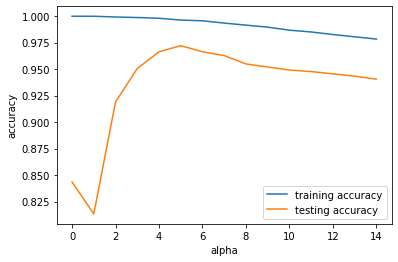

In [120]:
acc_train = []
acc_test = []
for alpha in range(15):
    classifier = MultinomialNB(alpha = alpha)
    classifier.fit(X_train, y_train)

# training performance
    train_pred = classifier.predict(X_train)
    acc_train.append(accuracy_score(y_train,train_pred))

# testing performance
    pred = classifier.predict(X_test)
    acc_test.append(accuracy_score(y_test,pred))
plt.plot(range(15),acc_train,label='training accuracy')
plt.plot(range(15),acc_test,label='testing accuracy')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

According to the result, we can see that the second method showed a similar trend like first method which reaches the largest test accuracy when alpha is around 4 to 6.

# Markov Chain
## (1)
The matrix of transition probability\
1 means it is raining on the given day.
$$\begin{array}{lc}
\mbox{}&
\begin{array}{cc}1&0 \end{array}\\
\begin{array}{c}1\\0\end{array}&
\left[\begin{array}{cc}
0.8&0.2\\
0.3&0.7
\end{array}\right]
\end{array}
$$
## (2)
$$
\begin{equation}
\begin{split}
p(x_{3}=1|x_{2}) \cdot p(x_{2}|x_{1} = 1) &= p(x_{3}=1|x_{2}=1) \cdot p(x_{2}=1|x_{1}=1) + p(x_{3}=1|x_{2}=0) \cdot p(x_{2}=0|x_{1}=1)\\
& = 0.8 \cdot 0.8  + 0.3 \cdot 0.2 \\
& = 0.64 + 0.06 \\
& = 0.7
\end{split}
\end{equation}
$$
$\therefore$ the probability of “Day 3” is raining is 0.7, when “Day 1” is raining
## (3)

In [79]:
from pomegranate import *

d1 = DiscreteDistribution({'A': 1.0, 'B':0})
d2 = ConditionalProbabilityTable([['A', 'A', 0.8],
                                ['A', 'B', 0.2],
                                ['B', 'A', 0.3],
                                ['B', 'B', 0.7]], [d1])

clf = MarkovChain([d1, d2])
print(np.exp(clf.log_probability(list('AAA'))))
print(np.exp(clf.log_probability(list('ABA'))))

0.64
0.06
